# **Summer Olympics Data Analysis Assignment**

### **1. In how many cities Summer Olympics is held so far?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Summer.csv")

In [3]:
df.shape

(31165, 9)

In [4]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
len(df['City'].unique())         

22

### **2. Which sport is having most number of Gold Medals so far? (Top 5)**

In [7]:
df['Medal'].value_counts()

Gold      10486
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

In [8]:
data=[]
gold_medals=df[df['Medal']=='Gold']
for Sport in gold_medals['Sport'].unique():
   data.append([Sport,len(gold_medals[gold_medals['Sport']==Sport])])
data=pd.DataFrame(data,columns=['Sport','Medal'])
data=data.sort_values(by='Medal',ascending=False).head()

In [9]:
data

,Sport,Medal
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


AxesSubplot(0.125,0.125;0.775x0.755)


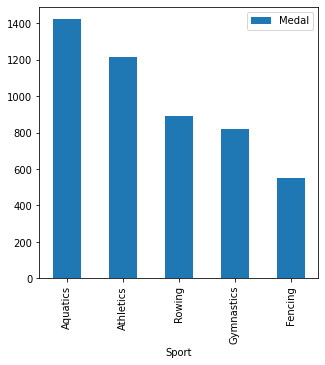

In [10]:
print(data.plot(x='Sport',y='Medal',kind='bar',figsize=(5,5)))

### **3. Which sport is having most number of medals so far? (Top 5)**


In [11]:
df['Medal']

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
31160    Bronze
31161      Gold
31162    Silver
31163    Bronze
31164    Bronze
Name: Medal, Length: 31165, dtype: object

In [12]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

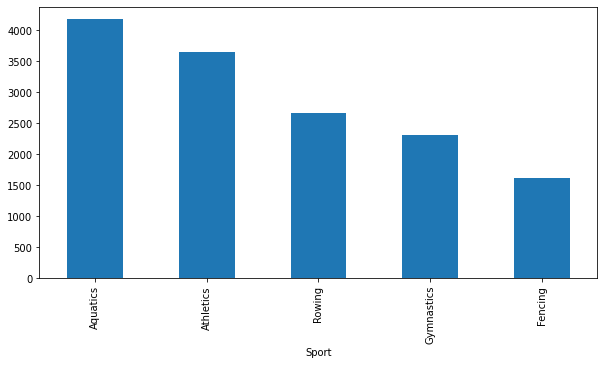

In [13]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

### **4. Which player has won most number of medals? (Top 5)**

In [14]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head()

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

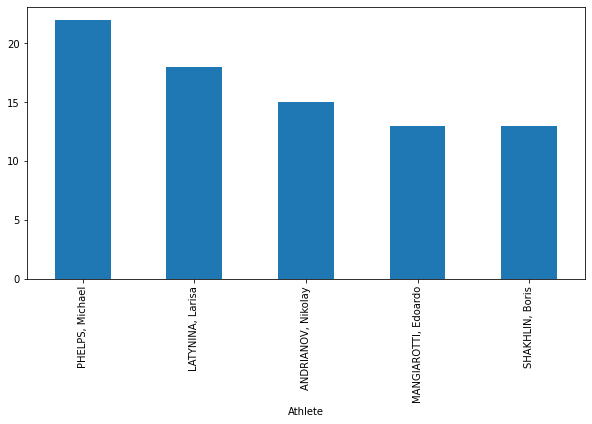

In [15]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

### **5. Which player has won most number Gold Medals of medals? (Top 5)**

In [16]:
value=[]
for Player in gold_medals['Athlete'].unique():
  value.append([Player,len(gold_medals[gold_medals['Athlete']==Player])])
value=pd.DataFrame(value,columns=['Player','GoldMedal'])
value=value.sort_values(by='GoldMedal',ascending=False).head()

In [17]:
value

,Player,GoldMedal
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


AxesSubplot(0.125,0.125;0.775x0.755)


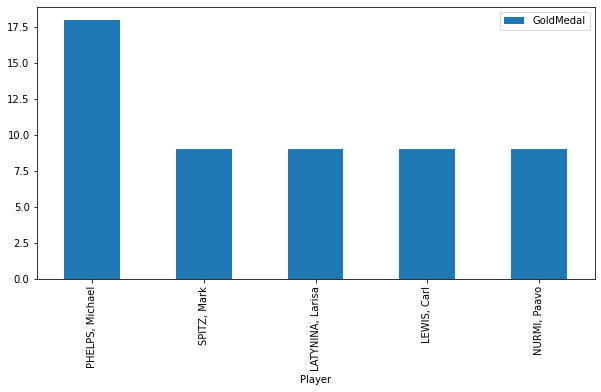

In [18]:
print(value.plot(x='Player',y='GoldMedal',kind='bar',figsize=(10,5)))

### **6. In which year India won first Gold Medal in Summer Olympics?**

In [19]:
first=df[(df['Country']=='IND')&(df['Medal']=='Gold')].head(1)

In [20]:
first

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


In [21]:
India_Gold=first['Year']

In [22]:
India_Gold

5512    1928
Name: Year, dtype: int64

In [23]:
print("India won first gold meadl in the year",India_Gold)

India won first gold meadl in the year 5512    1928
Name: Year, dtype: int64


### **7. Which event is most popular in terms on number of players? (Top 5)**

In [24]:
df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head()

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

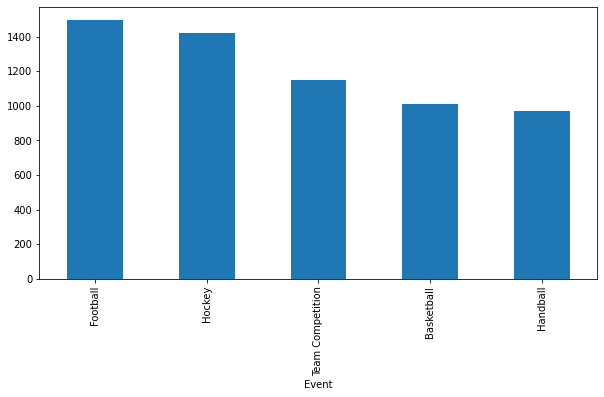

In [25]:
df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))

### **8. Which sport is having most female Gold Medalists? (Top 5)**

In [26]:
Female_Medalist = gold_medals[gold_medals['Gender']=='Women']
group=[]
for sport in Female_Medalist['Sport'].unique():
  group.append([sport, len(Female_Medalist[Female_Medalist['Sport']==sport])])

group= pd.DataFrame(group, columns=['Sport', 'WomenAthlete']).sort_values(by='WomenAthlete', ascending=False).head()


In [27]:
group

,Sport,WomenAthlete
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


AxesSubplot(0.125,0.125;0.775x0.755)


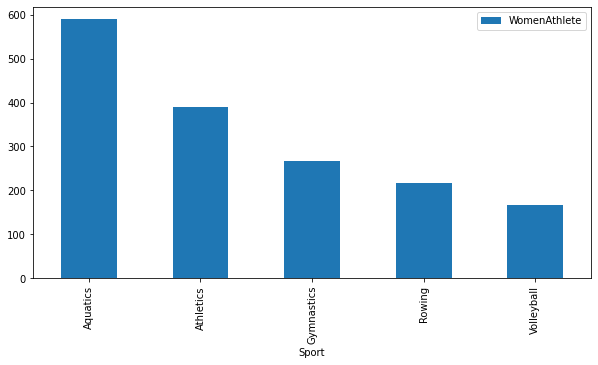

In [28]:
print(group.plot(x='Sport',y='WomenAthlete',kind='bar',figsize=(10,5)))